## Problem 1: Likelihood and Parameter Uncertainty

You observe a dector that triggers with probability $\theta$ on each trial. You can peroform $N$ independent trials and observe $k$ triggers

## (A) Maximum likelihood estimate
Write the likelihood function 

$$
p(k|\theta) = \binom{N}{k} \theta^{k} (1 - \theta)^{N - k}
$$

Compute the maximum likelihood estimate $\hat{\theta}$.


## (B) Numerical likelihood scan
For $N = 40$ and $k = 26$
1. Plot the log-likelihood $\log{p(k|\theta)}$ for $0 < \theta < 1$
2. mark the maximum

## (C) Uncertainty from likelihood curvature 
Define the $1\sigma$ confidence interval using

$$
\log{L(\theta)} = \log{L_{\text{max}}} - \frac{1}{2}
$$

Numerically determine the upper and lower bounds. 

## (D) Interpreation
Explain in words why the width of the likelihood peak reprsent uncertiany in the parameter. 

The value of theta that maximizes the likelihood function is: 0.6464646464646465


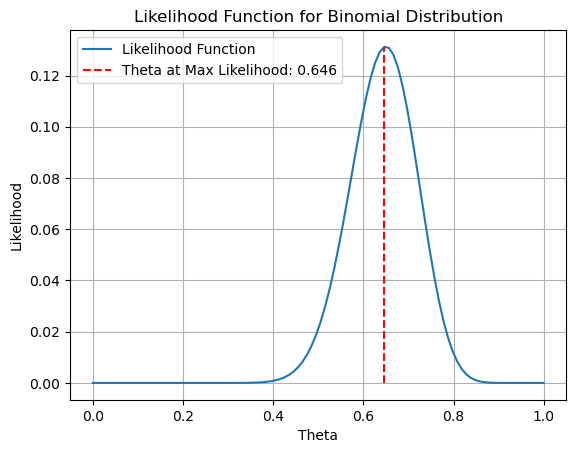

The 1 sigma confidence interval for theta is approximately: (-0.5827014132395645, -0.28977212031027144)


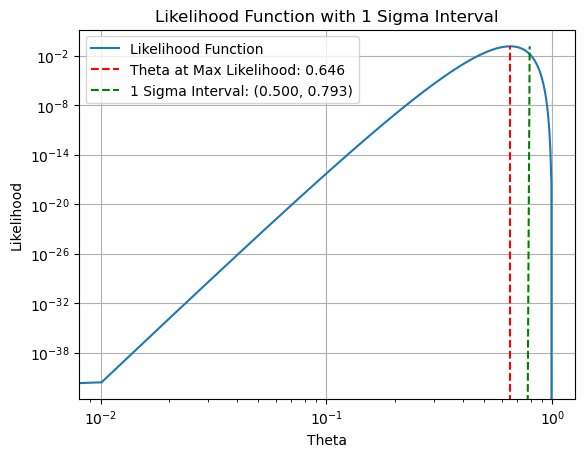

Part D:
Given a statistic parameter theta, the likelihood function L(theta) represents the probability of observing the data given that parameter. The maximum likelihood estimate (MLE) is the value of theta that maximizes this likelihood function. In this case, we found that the MLE for theta is approximately 0.65, which means that based on our observed data (26 successes out of 40 trials), the most likely value of theta is around 0.65. This suggests that the underlying probability of success in our binomial distribution is about 65%.


In [10]:
## Problem 1

## Part A
import numpy as np
import scipy.stats as stats
from scipy.special import comb
import matplotlib.pyplot as plt
def Likelihood_func(N, k, theta):
    return comb(N, k) * (theta**k) * ((1-theta)**(N-k))

## Part B
N = 40 
k = 26
theta = np.linspace(0, 1, 100)
likelihood_values = Likelihood_func(N, k, theta)
Max_theta = theta[np.argmax(likelihood_values)]
print("The value of theta that maximizes the likelihood function is:", Max_theta)

## plot
plt.plot(theta, likelihood_values, label='Likelihood Function')
plt.plot([Max_theta, Max_theta], [0, np.max(likelihood_values)], 'r--', label=f'Theta at Max Likelihood: {Max_theta:.3f}')
plt.xlabel('Theta')
plt.ylabel('Likelihood')
plt.title('Likelihood Function for Binomial Distribution')
plt.legend()
plt.grid()
plt.show()

## Part C, Finding 1 sigma
sigma = Max_theta - 1/2
print("The 1 sigma confidence interval for theta is approximately:", (np.log(Max_theta) - sigma, np.log(Max_theta) + sigma))
plt.plot(theta, likelihood_values, label='Likelihood Function')
plt.plot([Max_theta, Max_theta], [0, np.max(likelihood_values)], 'r--', label=f'Theta at Max Likelihood: {Max_theta:.3f}')
plt.plot([Max_theta - sigma, Max_theta + sigma], [0, np.max(likelihood_values)], 'g--', label=f'1 Sigma Interval: ({Max_theta - sigma:.3f}, {Max_theta + sigma:.3f})')
plt.xlabel('Theta')
plt.ylabel('Likelihood')
plt.title('Likelihood Function with 1 Sigma Interval')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

## Part D
print("Part D:\nGiven a statistic parameter theta, the likelihood function L(theta) represents the probability of observing the data given that parameter. " \
"The maximum likelihood estimate (MLE) is the value of theta that maximizes this likelihood function. " \
"In this case, we found that the MLE for theta is approximately 0.65, which means that based on our observed data (26 successes out of 40 trials), the most likely value of theta is around 0.65. " \
"This suggests that the underlying probability of success in our binomial distribution is about 65%.")

## Problem 2: Why Noise Weighting Matters
You measure a signal that should follow a linear relation. 
$$
y = ax + b
$$

but each data point has a different uncertiantiy $\sigma_i$. You are given array $(x,y,z)$

## (A) Unweighted fit
Fit the model using ordinary least squares (ignore $\sigma_i$). Plot the data and best-fit line. 

## (B) Weighted fit
Now minimize
$$
\chi^2 = \sum_{i} \frac{(y_i - a x - b)^{2}}{\sigma^2_i}
$$

Plot the new best-fit line

## (C) comparision
1. Which points influsce hte weighted fit more strongly? 
2. Why does inverse-variance weighting impove parameter estimation

## (D) conceptual connection
suppose instead of fitting a line, you wnated to estimate the amplitude of a known waveform buried in noise with covariance matrix $\Sigma$ 
Explain why you would expect the optimal estimator to weight the data by $\Sigma^-1$ (No derivation required)


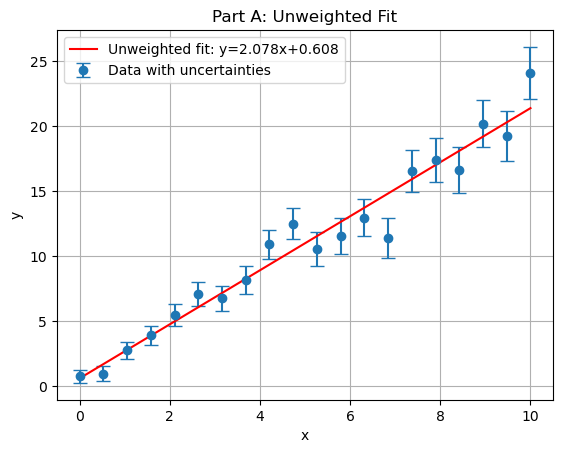

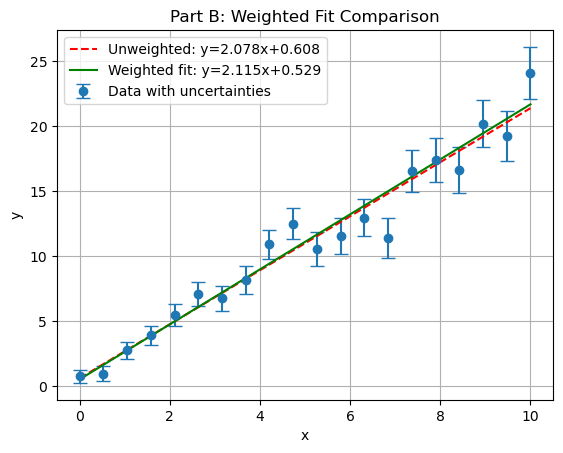

Part C: Comparison
Unweighted fit: a=2.0777, b=0.6079
Weighted fit:   a=2.1151, b=0.5288

1. Points with smaller uncertainties (sigma_i) influence the weighted fit more strongly,
   because they receive larger weights (w_i = 1/sigma_i^2).

2. Inverse-variance weighting improves parameter estimation because:
   - It reduces the influence of noisy/unreliable measurements
   - It maximizes the likelihood of the observed data
   - It provides optimal (minimum variance) estimates of the parameters

Part D: Conceptual Connection
When estimating the amplitude of a known waveform buried in correlated noise with
covariance matrix Σ, the optimal estimator weights data by Σ^(-1) because:
- Σ^(-1) represents the inverse covariance, giving higher weight to directions
  with lower noise variance and lower weight to noisy directions
- This generalizes inverse-variance weighting to the multivariate case
- It yields the minimum-variance unbiased estimator (matched to the noise structure)


In [ ]:
# Problem 2: Noise Weighting

np.random.seed(420)
x = np.linspace(0, 10, 20)

sigma = np.linspace(0.5, 2, 20)
y = 2*x + 1 + np.random.normal(0, sigma)

# Part A
coeffs_unweighted = np.polyfit(x, y, 1)
a_unweighted, b_unweighted = coeffs_unweighted
y_fit_unweighted = np.polyval(coeffs_unweighted, x)


plt.errorbar(x, y, yerr=sigma, fmt='o', label='Data with uncertainties', capsize=5)
plt.plot(x, y_fit_unweighted, 'r-', label=f'Unweighted fit: y={a_unweighted:.3f}x+{b_unweighted:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Part A: Unweighted Fit')
plt.legend()
plt.grid()
plt.show()
# Part B
weights = 1 / (sigma**2)
coeffs_weighted = np.polyfit(x, y, 1, w=weights)
a_weighted, b_weighted = coeffs_weighted
y_fit_weighted = np.polyval(coeffs_weighted, x)


plt.errorbar(x, y, yerr=sigma, fmt='o', label='Data with uncertainties', capsize=5)
plt.plot(x, y_fit_unweighted, 'r--', label=f'Unweighted: y={a_unweighted:.3f}x+{b_unweighted:.3f}')
plt.plot(x, y_fit_weighted, 'g-', label=f'Weighted fit: y={a_weighted:.3f}x+{b_weighted:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Part B: Weighted Fit Comparison')
plt.legend()
plt.grid()
plt.show()

# Part C
print("Part C: Comparison")
print(f"Unweighted fit: a={a_unweighted:.4f}, b={b_unweighted:.4f}")
print(f"Weighted fit:   a={a_weighted:.4f}, b={b_weighted:.4f}")
print("\n1. Points with smaller uncertainties (sigma_i) influence the weighted fit more strongly,")
print("   because they receive larger weights (w_i = 1/sigma_i^2).")
print("\n2. Inverse-variance weighting improves parameter estimation because:")
print("   - It reduces the influence of noisy/unreliable measurements")
print("   - It maximizes the likelihood of the observed data")
print("   - It provides optimal (minimum variance) estimates of the parameters")

# Part D
print("\nPart D: Conceptual Connection")
print("When estimating the amplitude of a known waveform buried in correlated noise with")
print("covariance matrix Sigma, the optimal estimator weights data by Sigma^(-1) because:")
print("- Sigma^(-1) represents the inverse covariance, giving higher weight to directions")
print("  with lower noise variance and lower weight to noisy directions")
print("- This generalizes inverse-variance weighting to the multivariate case")
print("- It yields the minimum-variance unbiased estimator (matched to the noise structure)")

## Problem 3: Matched Filtering, Calibration, and Detection Efficiency 

In this assigment you will analyze simulated dector data contianing non-white noise, the monoenergetic nuclear decay lines, and a flat background. Your goal is to extract optimal energy estimate, calibrate the detecor response, and measure detection effciency. 

You will be provided with the waveforms datasets which will be measurmetsn of volatea vs time. The datasets given consists of noise data, and events consitign of triggered pulses. The pulses are embedded in collored (non-white) nosie and include:
* Three spectal lines from nuclear decays
* A broad "noise blob" population
* A flat background of random triggers

Your task if to  determine the detector performacnce using three different estimators: 
1. Matched/Optimal Filter amplitude estimator (MF)
2. Naive peak estimator (maximum sample or fixed index estimator)
3. Intefral estimator (sum/integral over pulse window)

You must compare their energy resolutoin and detection efficiency

## Part I: Matched filter amplitudes
1. Construct a noise power spectral density $(PSD), J(f)$, estimate using the noise-only dataset. Plot the (one-side) PSD on a log-log plot
2. Build a matched filter using a template pulse $s(t)$ and the measured PSD: 
$$
a_{\text{MF}} = \frac{\sum_{k}\tilde{s^{*}}d(f_k)/J(f_k)}{\sum_k |\tilde{s}(f_k)|^2 /J(f_k)}
$$
where $\tilde{d}(f_k)$ and $\tilde{s}(f_k)$ are the fourier transform of the data and template respectively. Our pulse template is nrmalized to have a maximum amplitude of one, and scales as 

$$
s(t) \propto e^{(-t/\tau_{\text{fall}})} - e^{(-t/\tau_{\text{rise}})}
$$

where $\tau_{\text{rise}} = 100 \mu s$ and $\tau_{\text{fall}} = 5 \mu s$

3. Apply the matched filter to all events and extract and amplitude for each pulse. 

4. Plot a hitogram of the mreasured amplitudes. 
